<a href="https://colab.research.google.com/github/Frederick-Stein/Data-Science-Playground/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [51]:
url = "https://raw.githubusercontent.com/Frederick-Stein/Data-Science-Playground/refs/heads/main/Models/Random_Forest/loan_approval_dataset.csv"
df = pd.read_csv(url)


In [52]:
# EDA
print(df.shape)

(4269, 13)


In [53]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [55]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [56]:
# features and labels
X = df.drop(columns=['loan_id', ' loan_status'], axis = 1)
y = df[' loan_status']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 367.0+ KB


In [57]:
# encode categorical variables
X[' education'] = X[' education'].map({' Not Graduate': 0, ' Graduate': 1})
X[' self_employed'] = X[' self_employed'].map({' No': 0, ' Yes': 1})
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [58]:
y = y.map({' Rejected': 0, ' Approved': 1})
y.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


In [59]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .4f}")
print(classification_report(y_test, y_pred))

Accuracy:  0.9801
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [60]:
# feature importance
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)
print(feature_scores)

cibil_score                 0.811883
loan_term                   0.064690
loan_amount                 0.028114
residential_assets_value    0.017763
income_annum                0.017620
luxury_assets_value         0.017199
bank_asset_value            0.015356
commercial_assets_value     0.014708
no_of_dependents            0.008082
self_employed               0.002402
education                   0.002183
dtype: float64


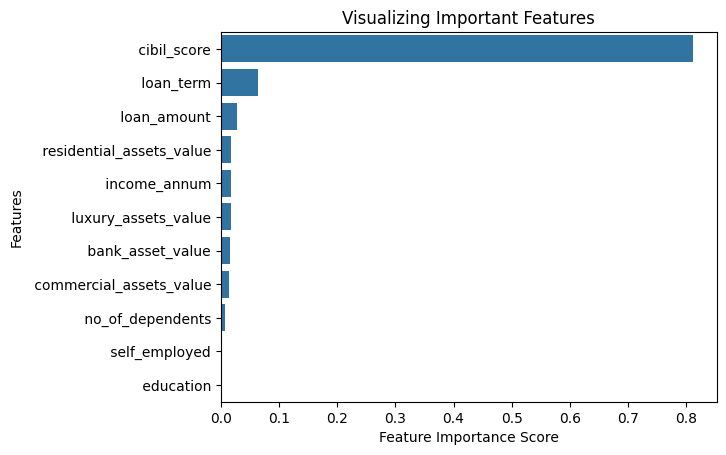

In [61]:
# visualize
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [63]:
# drop least importance features
X = df.drop(['loan_id', ' loan_status', ' education'], axis = 1)
X[' self_employed'] = X[' self_employed'].map({' No': 0, ' Yes': 1})
y = df[' loan_status']
y = y.map({' Rejected': 0, ' Approved': 1})
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .4f}")
print(classification_report(y_test, y_pred))

Accuracy:  0.9813
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



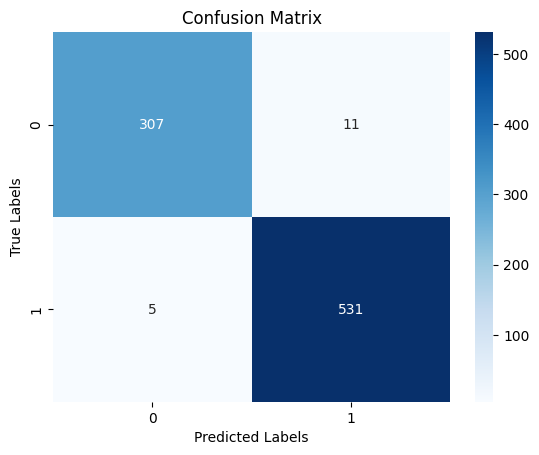

In [65]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()